In [1]:
from os import path
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import seaborn as sns
from tqdm import tqdm


from experiment.v1dd_client import V1DDClient
from experiment.v1dd_ophys_session import V1DDOPhysSession
from stimulus_analysis.stimulus_analysis import StimulusAnalysis
from stimulus_analysis.drifting_gratings import DriftingGratings
import analysis_tools as at

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
# base_folder = r"\\allen\programs\mindscope\workgroups\surround\v1dd_in_vivo_new_segmentation\data"
# base_folder = "/Volumes/programs/mindscope/workgroups/surround/v1dd_in_vivo_new_segmentation/data"
base_folder = "/Volumes/AllenDrive/v1dd/data" # Chase's external hard drive
# base_folder = "/Users/chase/Desktop/test_v1dd_data"
client = V1DDClient(base_folder)

In [19]:
metrics = pd.read_csv("/Users/chase/Desktop/v1dd_metrics.csv", index_col=0, low_memory=False)

# Only consider valid metrics
print(f"{np.count_nonzero(metrics.is_valid)}/{len(metrics)} ({np.mean(metrics.is_valid)*100:.1f}%) ROIs are valid")
# metrics = metrics[metrics.is_valid & (metrics.mouse == 409828) & (metrics.column == 1)]
metrics = metrics[metrics.is_valid & (metrics.mouse == 409828) & (metrics.column == 1) & (metrics.volume == "3")]
print(f"{len(metrics)} ROIs are being analyzed")
metrics.head()

9714/52826 (18.4%) ROIs are valid
2708 ROIs are being analyzed


,mouse,column,volume,plane,roi,is_valid,depth,dgf_pref_response,dgf_pref_dir,dgf_pref_sf,...,dgw_is_valid,dgw_pref_ori,dgw_chisq_response_p,dgw_resp_pref_dgf,dgf_resp_pref_dgw,ssi,ffsi,ssi_pref_both,ssi_orth,ffsi_all_dirs
M409828_13_1_0,409828,1,3,1,0,True,242,0.001121,0.0,0.04,...,True,90.0,0.104,0.000632,0.000876,0.207730,0.344001,0.087349,-0.154737,"[-0.7753708, 1.0, 0.16036563, 0.34400067, 0.61..."
M409828_13_1_1,409828,1,3,1,1,True,242,0.001282,0.0,0.04,...,True,0.0,0.310,0.001739,0.001282,0.151181,0.262654,0.151181,-0.061618,"[0.26265374, 0.5558788, 0.7853129, 0.3490762, ..."
M409828_13_1_2,409828,1,3,1,2,True,242,0.000934,0.0,0.04,...,True,30.0,0.898,0.000328,0.000183,0.658287,0.793936,-0.024418,-0.155871,"[1.0, -2.421106, -0.76455927, 0.0008685294, -0..."
M409828_13_1_3,409828,1,3,1,3,True,242,0.002260,120.0,0.08,...,True,120.0,0.448,0.001114,0.002177,-0.134880,-0.311819,-0.153094,-0.433547,"[-0.072742686, -4.2592764, -0.15269718, -0.899..."
M409828_13_1_4,409828,1,3,1,4,True,242,0.001457,300.0,0.04,...,True,90.0,0.510,0.000848,0.001133,0.125898,0.223640,0.000868,-0.083123,"[0.053975064, 0.6652593, 1.0, 0.22363992, -0.8..."


In [44]:
# metrics.ssi[metrics.ssi < 1].sort_values(ascending=False).head(50)
metrics.ssi[(metrics.ssi < 1) & (metrics.dgw_pref_response > 0.01)].sort_values(ascending=False).head(50)

M409828_13_3_91     0.991117
M409828_13_1_57     0.980875
M409828_13_2_221    0.977892
M409828_13_3_25     0.975883
M409828_13_5_19     0.975499
M409828_13_3_290    0.974767
M409828_13_3_179    0.974718
M409828_13_2_23     0.968121
M409828_13_6_68     0.963656
M409828_13_2_109    0.963229
M409828_13_1_33     0.961974
M409828_13_3_31     0.961726
M409828_13_3_80     0.959956
M409828_13_1_238    0.959815
M409828_13_4_27     0.958255
M409828_13_3_94     0.952965
M409828_13_4_50     0.951606
M409828_13_2_38     0.948703
M409828_13_3_197    0.947447
M409828_13_1_77     0.947112
M409828_13_3_77     0.945664
M409828_13_1_43     0.945253
M409828_13_1_102    0.944389
M409828_13_3_204    0.943165
M409828_13_3_8      0.938794
M409828_13_2_74     0.934752
M409828_13_3_98     0.930051
M409828_13_3_12     0.929051
M409828_13_2_30     0.928388
M409828_13_4_117    0.926548
M409828_13_3_219    0.921843
M409828_13_3_143    0.919048
M409828_13_4_212    0.918396
M409828_13_6_0      0.916505
M409828_13_3_3

In [30]:
session_cache = {}

def get_session(session_id):
    if session_id in session_cache:
        return session_cache[session_id]["session"]
    else:
        print(f"Session {session_id} not in cache; loading...")
        session = client.load_ophys_session(session_id=session_id)
        session_cache[session_id] = dict(session=session)
        return session

def get_dgf_dgw(session, plane):
    session_id = session.get_session_id()
    cache = session_cache[session_id]
    
    if "plane_analysis" not in cache:
        cache["plane_analysis"] = {}
    if plane not in cache["plane_analysis"]:
        cache["plane_analysis"][plane] = {}
    if "dgf" not in cache["plane_analysis"][plane]:
        print(f"DG analysis for {session_id} not in cache; loading...")
        cache["plane_analysis"][plane]["dgf"] = DriftingGratings(session, plane, dg_type="full")
        cache["plane_analysis"][plane]["dgw"] = DriftingGratings(session, plane, dg_type="windowed")
    
    return cache["plane_analysis"][plane]["dgf"], cache["plane_analysis"][plane]["dgw"]


Positive SSI
- M409828_13_3_91 (OS)
- M409828_13_3_25 (DS)
- M409828_13_3_290 (DS)
- M409828_13_5_4 (highly DS, 300°, overlapping)
- M409828_13_3_41 (highly DS, 300°, overlapping, almost same as M409828_13_5_4 above but 50% weaker response)
- M409828_13_2_24 (OS, 30° and 210°, overlapping, W approx 3F)
- M409828_13_4_75 (highly DS, 300°, overlapping)

~Zero SSI (almost identical DG responses)
- M409828_13_2_49 (DS and OS, 60° and 240°)
- M409828_13_3_34 (highly DS, 300-330°)
- M409828_13_3_4 (highly DS, 180°)
- M409828_13_4_45 (highly DS, 150°)

Negative SSI:
- M409828_13_3_29 (OS)
- M409828_13_1_26 (highly OS, very strong DGF)
- M409828_13_5_196 (highly DS, 300-330°)
- M409828_13_2_4 (highly OS, highly overlapping pref. conditions, 30 and 210°)
- M409828_13_3_95 (almost identical as M409828_13_2_4 above)
- M409828_13_1_29 (OS, 190 and 300°, overlapping pref. conditions)
- M409828_13_1_41 (highly OS, 30° and 210°, overlapping pref. conditions)
- M409828_13_4_59 (highly DS, 90°, overlapping pref. cond.)
- M409828_13_3_24 (highly DS, 120, overlapping pref. cond.)


EM questions
- morphological differences between M409828_13_2_4 and M409828_13_3_95

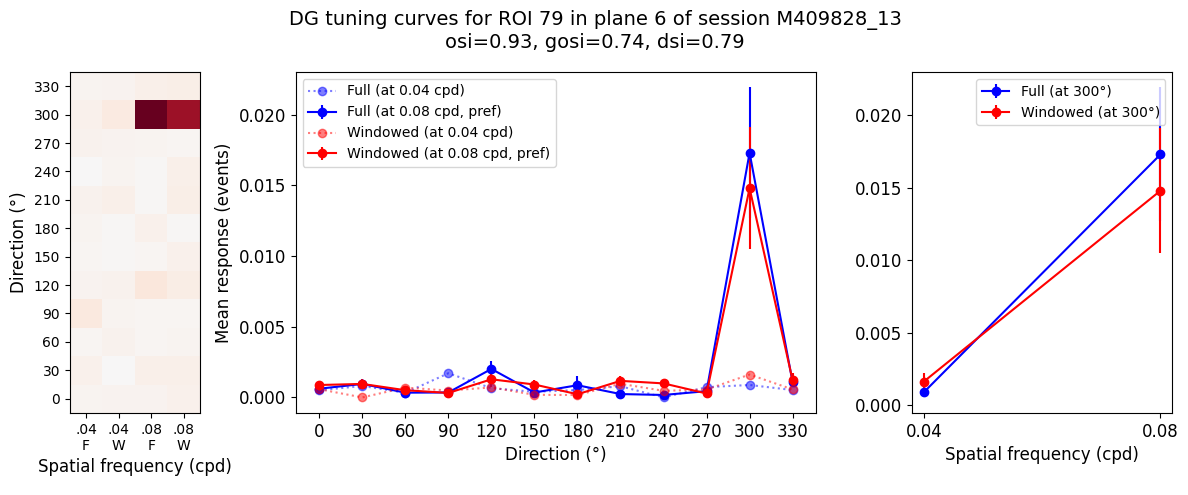

In [126]:
index = "M409828_13_6_79"
session_id, plane, roi = index.rsplit("_", maxsplit=2)
plane = int(plane)
roi = int(roi)
session = get_session(session_id)
dgf, dgw = get_dgf_dgw(session, plane)
fig = dgf.plot_roi_tuning_curves(roi=roi, dg_other=dgw, plot_all_sf=True)

In [116]:
dgw_responsive = metrics.dgw_frac_responsive_trials >= 0.5
dgf_responsive = metrics.dgf_frac_responsive_trials >= 0.5
matching_dir = (metrics.dgw_pref_dir_idx - metrics.dgf_pref_dir_idx).abs().isin([0, 6])
small_ssi = metrics.ssi.abs() < 0.1
strong_response = (metrics.dgw_pref_response > 0.01) | (metrics.dgf_pref_response > 0.01)
metrics.ssi[dgw_responsive & dgf_responsive & matching_dir & strong_response & small_ssi].sort_values(ascending=False).head(60)

M409828_13_6_220    0.080564
M409828_13_1_64     0.053726
M409828_13_2_80     0.051173
M409828_13_2_49     0.008060
M409828_13_3_34    -0.002560
M409828_13_3_4     -0.013132
M409828_13_3_242   -0.013633
M409828_13_3_58    -0.046678
M409828_13_4_45    -0.074062
M409828_13_6_79    -0.078011
Name: ssi, dtype: float64